# Drawing pieces

In [1]:
def Drawing(string):

    Num = ["1","2","3","4","5","6","7","8"]
    for piece in string:
        if piece == "r":
            print("♜", end="")
        elif piece == "n":
            print("♞", end="")
        elif piece == "b":
            print("♝", end="")
        elif piece == "q":
            print("♛", end="")
        elif piece == "k":
            print("♚", end="")
        elif piece == "p":
            print("♟", end="")


        elif piece == "R":
            print("♖", end="")
        elif piece == "N":
            print("♘", end="")
        elif piece == "B":
            print("♗", end="")
        elif piece == "Q":
            print("♕", end="")
        elif piece == "K":
            print("♔", end="")
        elif piece == "P":
            print("♙", end="")
        
        elif piece == "/":
            print("")
            print("----------------")
        
        elif piece in Num:
            for s in range(int(piece)):
                print("　", end="")
        elif piece == " ":
            break

Drawing()
        

TypeError: Drawing() missing 1 required positional argument: 'string'

## Open source

In [3]:
from __future__ import print_function#OPEN SOURCE
from __future__ import division#OPEN SOURCE
from functools import partial#OPEN SOURCE
import math#OPEN SOURCE
import re#OPEN SOURCE
import os#OPEN SOURCE


#######################################################################OPEN SOURCE
class PgnToFen:
    fen = 'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR'
    whiteToMove = True
    internalChessBoard = [
        'R','N','B','Q','K','B','N','R',
        'P','P','P','P','P','P','P','P',
        '1','1','1','1','1','1','1','1',
        '1','1','1','1','1','1','1','1',
        '1','1','1','1','1','1','1','1',
        '1','1','1','1','1','1','1','1',
        'p','p','p','p','p','p','p','p',
        'r','n','b','q','k','b','n','r']
    enpassant = '-'
    castlingRights = 'KQkq'
    DEBUG = False
    lastMove = 'Before first move'
    fens = []
    result = ''

    def getFullFen(self):
        return self.getFen() + ' ' + ('w ' if self.whiteToMove else 'b ') + self.enpassant + ' ' + (self.castlingRights if self.castlingRights else '-')

    def getFen(self):
        fenpos = ''
        for n in reversed((8,16,24,32,40,48,56,64)):
            emptyPosLength = 0;
            for i in self.internalChessBoard[n-8:n]:
                if(i is not '1'):
                    if(emptyPosLength is not 0):
                        fenpos = fenpos + str(emptyPosLength);
                        emptyPosLength = 0
                    fenpos = fenpos + i
                else:
                    emptyPosLength = emptyPosLength + 1
            if(emptyPosLength is not 0):
                fenpos = fenpos + str(emptyPosLength);
            fenpos = fenpos + '/'
        fenpos = fenpos[:-1]
        return fenpos

    def printFen(self):
        print(self.getFen())

    def moves(self, moves):
        if isinstance(moves, str):
            nrReCompile = re.compile('[0-9]+\.')
            transformedMoves = nrReCompile.sub('', moves)
            pgnMoves = transformedMoves.replace('  ', ' ').split(' ')
            result = pgnMoves[-1:][0]
            if(result in ['1/2-1/2', '1-0', '0-1']):
                self.result = result
                pgnMoves = pgnMoves[:-1]
            print('pgnMoves')
            print(pgnMoves)
            return self.pgnToFen(pgnMoves)
        else:
            return self.pgnToFen(moves)

    def pgnFile(self, file):
        pgnGames = {
        'failed' : [],
        'succeeded' : [],
        }
        started = False
        game_info = []
        pgnMoves = ''
        for moves in open(file, 'rt').readlines():

            if moves[:1] == '[':
                #print('game_info line: ', moves)
                game_info.append(moves)
                continue
            if moves[:2] == '1.':
                started = True
            if (moves == '\n' or moves == '\r\n') and started:
                try:
                    #print('Processing ', game_info[0:6])
                    pgnToFen = PgnToFen()
                    pgnToFen.resetBoard()
                    fens = pgnToFen.moves(pgnMoves).getAllFens()
                    pgnGames['succeeded'].append((game_info, fens))
                except ValueError as e:
                    pgnGames['failed'].append((game_info, '"' + pgnToFen.lastMove + '"', pgnToFen.getFullFen(), e))
                except TypeError as e:
                    pgnGames['failed'].append((game_info, '"' + pgnToFen.lastMove + '"', pgnToFen.getFullFen(), e))
                except IndexError as e:
                    raise IndexError(game_info, '"' + pgnToFen.lastMove + '"', pgnToFen.getFullFen(), e)
                    pgnGames['failed'].append((game_info, '"' + pgnToFen.lastMove + '"', pgnToFen.getFullFen(), e))
                except ZeroDivisionError as e:
                    pgnGames['failed'].append((game_info, '"' + pgnToFen.lastMove + '"', pgnToFen.getFullFen(), e))
                finally:
                    started = False
                    game_info = []
                    pgnMoves = ''
            if(started):
                pgnMoves = pgnMoves + ' ' + moves.replace('\n', '').replace('\r', '')
        return pgnGames

    def pgnToFen(self, moves):
        try:
            loopC = 1
            for move in moves:
                self.lastMove = move
                self.DEBUG and print('=========')
                self.DEBUG and print('Movenumber',loopC)
                self.DEBUG and print('TO MOVE:', 'w' if self.whiteToMove else 'b')
                self.DEBUG and print('MOVE:', move)
                self.move(move)
                self.DEBUG and print('after move:')
                self.DEBUG and self.printBoard()
                loopC = loopC + 1
                self.fens.append(self.getFullFen())
            self.sucess = True
            return self
        except ValueError:
            print('Converting PGN to FEN failed.')
            print('Move that failed:', self.lastMove)
            self.printBoard()
            print(self.getFullFen())
            self.fens = []
            self.sucess = False



    def move(self, move):
        try:
            self.lastMove = move
            self.handleAllmoves(move)
            if(self.whiteToMove):
                self.whiteToMove = False
            else:
                self.whiteToMove = True
            return self
        except ValueError:
            self.DEBUG and print('Converting PGN to FEN failed.')
            self.DEBUG and print('Move that failed:', self.lastMove)
            self.DEBUG and self.printBoard()
            self.DEBUG and print('FEN:', self.getFullFen())

    def getAllFens(self):
        return self.fens

    def handleAllmoves(self, move):
        move = move.replace('+', '')
        move = move.replace('#', '')
        promote = ''
        if(move.find('=') > -1):
            promote = move[-1]
            move = move[:-2]
        if(move.find('-O') != -1):
            self.castelingMove(move)
            return;
        toPosition = move[-2:]
        move = move[:-2]
        if len(move) > 0:
            if move[0] in ['R','N','B','Q','K']:
                officer = move[0]
                move = move[1:]
            else:
                officer = 'P'
        else:
            officer = 'P'
        takes = False
        if 'x' in move:
            takes = True
            move = move[:-1]
        specificRow = ""
        specificCol = ""
        if len(move) > 0:
            if move in ['1','2','3','4','5','6','7','8']:
                specificRow = move
            elif move in ['a','b','c','d','e','f','g','h']:
                specificCol = move
            elif len(move) == 2:
                specificCol = move[0]
                specificRow = move[1]
        if(officer != 'P'):
            self.enpassant = '-'
        if(officer == 'N'):
            self.knightMove(toPosition, specificCol, specificRow)
        elif(officer == 'B'):
            self.bishopMove(toPosition, specificCol, specificRow)
        elif(officer == 'R'):
            self.rookMove(toPosition, specificCol, specificRow)
        elif(officer == 'Q'):
            self.queenMove(toPosition, specificCol, specificRow)
        elif(officer == 'K'):
            self.kingMove(toPosition, specificCol, specificRow)
        elif(officer == 'P'):
            self.pawnMove(toPosition, specificCol, specificRow, takes, promote)

    def castelingMove(self, move):
        if(len(move) == 3): #short castling
            if(self.whiteToMove):
                self.internalChessBoard[7] = '1'
                self.internalChessBoard[6] = 'K'
                self.internalChessBoard[5] = 'R'
                self.internalChessBoard[4] = '1'
                self.castlingRights = self.castlingRights.replace('KQ','')

            else:
                self.internalChessBoard[63] = '1'
                self.internalChessBoard[62] = 'k'
                self.internalChessBoard[61] = 'r'
                self.internalChessBoard[60] = '1'
                self.castlingRights = self.castlingRights.replace('kq', '')
        else: # long castling
            if(self.whiteToMove):
                self.internalChessBoard[0] = '1'
                self.internalChessBoard[2] = 'K'
                self.internalChessBoard[3] = 'R'
                self.internalChessBoard[4] = '1'
                self.castlingRights = self.castlingRights.replace('KQ', '')
            else:
                self.internalChessBoard[60] = '1'
                self.internalChessBoard[59] = 'r'
                self.internalChessBoard[58] = 'k'
                self.internalChessBoard[56] = '1'
                self.castlingRights = self.castlingRights.replace('kq', '')

    def queenMove(self, move, specificCol, specificRow):
        column = move[:1]
        row = move[1:2]
        chessBoardNumber = self.placeOnBoard(row, column)
        piece = 'Q' if self.whiteToMove else 'q'
        possibelPositons = [i for i, pos in enumerate(self.internalChessBoard) if pos == piece]
        self.validQueenMoves(possibelPositons, move, specificCol, specificRow)
        self.internalChessBoard[chessBoardNumber] = piece

    def validQueenMoves(self, posistions, move, specificCol, specificRow):
        newColumn = self.columnToInt(move[:1])
        newRow = self.rowToInt(move[1:2])
        newPos = self.placeOnBoard(newRow + 1, move[:1])
        potensialPosisitionsToRemove=[]
        for pos in posistions:
            (existingRow, existingCol) = self.internalChessBoardPlaceToPlaceOnBoard(pos)
            diffRow = int(existingRow - newRow)
            diffCol = int(self.columnToInt(existingCol) - newColumn)
            if diffRow == 0 or diffCol == 0 or diffRow == diffCol or -diffRow == diffCol or diffRow == -diffCol:
                if not specificCol or specificCol == existingCol:
                    if not specificRow or (int(specificRow) -1) == int(existingRow):
                        xVect = 0
                        yVect = 0
                        if abs(diffRow) > abs(diffCol):
                            xVect = -(diffCol / abs(diffRow))
                            yVect = -(diffRow / abs(diffRow))
                        else:
                            xVect = -(diffCol / abs(diffCol))
                            yVect = -(diffRow / abs(diffCol))
                        checkPos = pos
                        nothingInBetween = True
                        while(checkPos != newPos):
                            checkPos = int(checkPos + yVect * 8 + xVect)
                            if(checkPos == newPos):
                                continue
                            if self.internalChessBoard[checkPos] != "1":
                                nothingInBetween = False
                        if nothingInBetween:
                            potensialPosisitionsToRemove.append(pos)
        if len(potensialPosisitionsToRemove) == 1:
            correctPos = potensialPosisitionsToRemove[0];
        else:
            if len(potensialPosisitionsToRemove) == 0:
                raise ValueError('Cant find a valid posistion to remove', potensialPosisitionsToRemove)
            notInCheckLineBindNewPos = partial(self.notInCheckLine, self.posOnBoard('K'))
            correctPosToRemove = list(filter(notInCheckLineBindNewPos, potensialPosisitionsToRemove))
            if len(correctPosToRemove) > 1:
                raise ValueError('Several valid positions to remove from the board')
            if len(correctPosToRemove) == 0:
                raise ValueError('None valid positions to remove from the board')
            correctPos = correctPosToRemove[0]
        self.internalChessBoard[correctPos] = "1"
        return


    def rookMove(self, move, specificCol, specificRow):
        column = move[:1]
        row = move[1:2]
        chessBoardNumber = self.placeOnBoard(row, column)
        piece = 'R' if self.whiteToMove else 'r'
        possibelPositons = [i for i, pos in enumerate(self.internalChessBoard) if pos == piece]
        self.validRookMoves(possibelPositons, move, specificCol, specificRow)
        self.internalChessBoard[chessBoardNumber] = piece

    def validRookMoves(self, posistions, move, specificCol, specificRow):
        newColumn = self.columnToInt(move[:1])
        newRow = self.rowToInt(move[1:2])
        newPos = self.placeOnBoard(newRow + 1, move[:1])
        potensialPosisitionsToRemove=[]
        if(len(posistions) == 1):
            self.internalChessBoard[posistions[0]] = "1"
            return
        for pos in posistions:
            (existingRow, existingCol) = self.internalChessBoardPlaceToPlaceOnBoard(pos)
            diffRow = int(existingRow - newRow)
            diffCol = int(self.columnToInt(existingCol) - newColumn)
            if diffRow == 0 or diffCol == 0:
                if not specificCol or specificCol == existingCol:
                    if not specificRow or (int(specificRow) -1) == int(existingRow):
                        xVect = 0
                        yVect = 0
                        if abs(diffRow) > abs(diffCol):
                            xVect = -(diffCol / abs(diffRow))
                            yVect = -(diffRow / abs(diffRow))
                        else:
                            xVect = -(diffCol / abs(diffCol))
                            yVect = -(diffRow / abs(diffCol))
                        checkPos = pos
                        nothingInBetween = True
                        while(checkPos != newPos):
                            checkPos = int(checkPos + yVect * 8 + xVect)
                            if(checkPos == newPos):
                                continue
                            if self.internalChessBoard[checkPos] != "1":
                                nothingInBetween = False
                        if nothingInBetween:
                            potensialPosisitionsToRemove.append(pos)
        if len(potensialPosisitionsToRemove) == 1:
            correctPos = potensialPosisitionsToRemove[0];
        else:
            if len(potensialPosisitionsToRemove) == 0:
                raise ValueError('Cant find a valid posistion to remove', potensialPosisitionsToRemove)
            notInCheckLineBindNewPos = partial(self.notInCheckLine, self.posOnBoard('K'))
            correctPosToRemove = list(filter(notInCheckLineBindNewPos, potensialPosisitionsToRemove))
            if len(correctPosToRemove) > 1:
                raise ValueError('Several valid positions to remove from the board')
            correctPos = correctPosToRemove[0]
        if(correctPos == 0):
            self.castlingRights = self.castlingRights.replace('Q', '')
        elif(correctPos == 63):
            self.castlingRights = self.castlingRights.replace('k', '')
        elif(correctPos == 7):
            self.castlingRights = self.castlingRights.replace('K', '')
        elif(correctPos == (63-8)):
            self.castlingRights = self.castlingRights.replace('q', '')
        self.internalChessBoard[correctPos] = "1"
        return

    def kingMove(self, move, specificCol, specificRow):
        column = move[:1]
        row = move[1:2]
        chessBoardNumber = self.placeOnBoard(row, column)
        piece = 'K' if self.whiteToMove else 'k'
        lostCastleRights = 'Q' if self.whiteToMove else 'q'
        kingPos = [i for i, pos in enumerate(self.internalChessBoard) if pos == piece]
        self.castlingRights = self.castlingRights.replace(piece, '')
        self.castlingRights = self.castlingRights.replace(lostCastleRights, '')
        self.internalChessBoard[chessBoardNumber] = piece
        self.internalChessBoard[kingPos[0]] = '1'


    def bishopMove(self, move, specificCol, specificRow):
        column = move[:1]
        row = move[1:2]
        chessBoardNumber = self.placeOnBoard(row, column)
        piece = 'B' if self.whiteToMove else 'b'
        possibelPositons = [i for i, pos in enumerate(self.internalChessBoard) if pos == piece]
        self.validBishopMoves(possibelPositons, move, specificCol, specificRow)
        self.internalChessBoard[chessBoardNumber] = piece

    def validBishopMoves(self, posistions, move, specificCol, specificRow):
        newColumn = self.columnToInt(move[:1])
        newRow = self.rowToInt(move[1:2])
        newPos = self.placeOnBoard(newRow + 1, move[:1])
        potensialPosisitionsToRemove = []
        for pos in posistions:
            (existingRow, existingCol) = self.internalChessBoardPlaceToPlaceOnBoard(pos)
            diffRow = int(existingRow - newRow)
            diffCol = int(self.columnToInt(existingCol) - newColumn)
            if diffRow == diffCol or -diffRow == diffCol or diffRow == -diffCol:
                if not specificCol or specificCol == existingCol:
                    if not specificRow or (int(specificRow) -1) == int(existingRow):
                        xVect = 0
                        yVect = 0
                        if abs(diffRow) > abs(diffCol):
                            xVect = -(diffCol / abs(diffRow))
                            yVect = -(diffRow / abs(diffRow))
                        else:
                            xVect = -(diffCol / abs(diffCol))
                            yVect = -(diffRow / abs(diffCol))
                        checkPos = pos
                        nothingInBetween = True
                        while(checkPos != newPos):
                            checkPos = int(checkPos + yVect * 8 + xVect)
                            if(checkPos == newPos):
                                continue
                            if self.internalChessBoard[checkPos] != "1":
                                nothingInBetween = False
                        if nothingInBetween:
                            potensialPosisitionsToRemove.append(pos)
        if len(potensialPosisitionsToRemove) == 1:
            correctPos = potensialPosisitionsToRemove[0];
        else:
            if len(potensialPosisitionsToRemove) == 0:
                raise ValueError('Cant find a valid posistion to remove', potensialPosisitionsToRemove)
            notInCheckLineBindNewPos = partial(self.notInCheckLine, self.posOnBoard('K'))
            correctPosToRemove = list(filter(notInCheckLineBindNewPos, potensialPosisitionsToRemove))
            if len(correctPosToRemove) > 1:
                raise ValueError('Several valid positions to remove from the board')
            correctPos = correctPosToRemove[0]
        self.internalChessBoard[correctPos] = "1"

    def knightMove(self, move, specificCol, specificRow):
        column = move[:1]
        row = move[1:2]
        chessBoardNumber = self.placeOnBoard(row, column)
        piece = 'N' if self.whiteToMove else 'n'
        knightPositons = [i for i, pos in enumerate(self.internalChessBoard) if pos == piece]
        self.validKnighMoves(knightPositons, move, specificCol, specificRow)
        self.internalChessBoard[chessBoardNumber] = piece

    def validKnighMoves(self, posistions, move, specificCol, specificRow):
        newColumn = self.columnToInt(move[:1])
        newRow = self.rowToInt(move[1:2])
        potensialPosisitionsToRemove = []
        for pos in posistions:
            (existingRow, existingCol) = self.internalChessBoardPlaceToPlaceOnBoard(pos)
            validatePos = str(int(existingRow - newRow)) + str(int(self.columnToInt(existingCol) - newColumn))
            if validatePos in ['2-1','21','1-2','12','-1-2','-12','-2-1','-21']:
                if not specificCol or specificCol == existingCol:
                    if not specificRow or (int(specificRow) -1) == int(existingRow):
                            potensialPosisitionsToRemove.append(pos)
        if len(potensialPosisitionsToRemove) == 1:
            correctPos = potensialPosisitionsToRemove[0];
        else:
            if len(potensialPosisitionsToRemove) == 0:
                raise ValueError('Cant find a valid posistion to remove', potensialPosisitionsToRemove)
            notInCheckLineBindNewPos = partial(self.notInCheckLine, self.posOnBoard('K'))
            correctPosToRemove = list(filter(notInCheckLineBindNewPos, potensialPosisitionsToRemove))
            if len(correctPosToRemove) > 1:
                raise ValueError('Several valid positions to remove from the board')
            if len(correctPosToRemove) == 0:
                raise ValueError('None valid positions to remove from the board')
            correctPos = correctPosToRemove[0]
        self.internalChessBoard[correctPos] = "1"
        return
    def pawnMove(self, toPosition, specificCol, specificRow, takes, promote):
        column = toPosition[:1]
        row = toPosition[1:2]
        chessBoardNumber = self.placeOnBoard(row, column)
        if(promote):
            piece = promote if self.whiteToMove else promote.lower()
        else:
            piece = 'P' if self.whiteToMove else 'p'
        self.internalChessBoard[chessBoardNumber] = piece
        if(takes):
            removeFromRow = (int(row) - 1) if self.whiteToMove else (int(row) + 1)
            posistion = self.placeOnBoard(removeFromRow, specificCol)
            piece = self.internalChessBoard[posistion] = '1'
            if(self.enpassant != '-'):
                enpassantPos = self.placeOnBoard(self.enpassant[1], self.enpassant[0])
                toPositionPos = self.placeOnBoard(toPosition[1], toPosition[0])
                if(self.enpassant == toPosition):
                    if(self.whiteToMove == True):
                        self.internalChessBoard[chessBoardNumber - 8] = '1'
                    else:
                        self.internalChessBoard[chessBoardNumber + 8] = '1'
                        return

        else:
            #run piece one more time if case of promotion
            piece = 'P' if self.whiteToMove else 'p'
            self.updateOldLinePos(piece,chessBoardNumber, toPosition)


    def updateOldLinePos(self, char, posistion, toPosition):
        startPos = posistion
        counter = 0;
        piece = ''
        step = 8
        while(posistion >= 0 and posistion < 64):
            if(piece == char):
                if(abs(posistion - startPos) > 10):
                    (row, column) = self.internalChessBoardPlaceToPlaceOnBoard(startPos)
                    rowAdjustedByColor = -1 if self.whiteToMove else 1
                    enpassant = str(column) + str(int(row) + 1 + rowAdjustedByColor)
                    self.enpassant = enpassant
                else:
                    self.enpassant = '-'
                piece = self.internalChessBoard[posistion] = '1'
                return;
            else:
                if(self.whiteToMove == True):
                    posistion = posistion - step
                else:
                    posistion = posistion + step
                piece = self.internalChessBoard[posistion]


    def placeOnBoard(self, row, column):
        # returns internalChessBoard place
        return 8 * (int(row) - 1) + self.columnToInt(column);

    def internalChessBoardPlaceToPlaceOnBoard(self, chessPos):
        column = int(chessPos) % 8
        row = math.floor(chessPos/8)
        return (row, self.intToColum(column))

    def rowToInt(self, n):
        return int(n)-1

    def columnToInt(self, char):
        # TODO: char.toLowerCase???
        if(char == 'a'):
            return 0
        elif(char == 'b'):
            return 1
        elif(char == 'c'):
            return 2
        elif(char == 'd'):
            return 3
        elif(char == 'e'):
            return 4
        elif(char == 'f'):
            return 5
        elif(char == 'g'):
            return 6
        elif(char == 'h'):
            return 7

    def intToColum(self, num):
        # TODO: char.toLowerCase???
        if(num == 0):
            return 'a'
        elif(num == 1):
            return 'b'
        elif(num == 2):
            return 'c'
        elif(num == 3):
            return 'd'
        elif(num == 4):
            return 'e'
        elif(num == 5):
            return 'f'
        elif(num == 6):
            return 'g'
        elif(num == 7):
            return 'h'

    def resetBoard(self):
        self.fen = 'rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR'
        self.whiteToMove = True
        self.enpassant = '-'
        self.internalChessBoard = [
            'R','N','B','Q','K','B','N','R',
            'P','P','P','P','P','P','P','P',
            '1','1','1','1','1','1','1','1',
            '1','1','1','1','1','1','1','1',
            '1','1','1','1','1','1','1','1',
            '1','1','1','1','1','1','1','1',
            'p','p','p','p','p','p','p','p',
            'r','n','b','q','k','b','n','r']
        self.result = ''

    def printBoard(self):
        loop = 1
        for i in self.internalChessBoard:
            print(i, end=' ')
            if(loop%8 == 0):
                print()
            loop = loop + 1

    def notInCheckLine(self, kingPos, piecePos):
        """
            Verifies that the piece is not standing in "line of fire" between and enemy piece and your king as the only piece
            :returns: True if the piece can move
        """
        return self.checkLine(kingPos, piecePos)

    def checkLine(self, kingPos, piecePos):
        (kingRowInt, kingColumn) = self.internalChessBoardPlaceToPlaceOnBoard(kingPos)
        kingColumnInt = self.columnToInt(kingColumn)
        (pieceRowInt, pieceColumn) = self.internalChessBoardPlaceToPlaceOnBoard(piecePos);
        pieceColumnInt = self.columnToInt(pieceColumn)

        diffRow = int(kingRowInt - pieceRowInt)
        diffCol = int(kingColumnInt - pieceColumnInt)
        if (abs(diffRow) !=  abs(diffCol)) and diffRow != 0 and diffCol != 0:
            return True
        if abs(diffRow) > abs(diffCol):
            xVect = (diffCol / abs(diffRow))
            yVect = -(diffRow / abs(diffRow))
        else:
            xVect = -(diffCol / abs(diffCol))
            yVect = -(diffRow / abs(diffCol))
        checkPos = kingPos
        nothingInBetween = True
        while checkPos != piecePos and (checkPos < 64 and checkPos > 0):
            checkPos = int(checkPos + yVect * 8 + xVect)
            if(checkPos == piecePos):
                continue
            if self.internalChessBoard[checkPos] != "1":
                #print('Something between king and piece, returning a false value')
                # Piece between the king and the piece can not be a self-disvoery-check.
                return True
        #print('No piece between the king and the piece, need to verify if an enemy piece with the possibily to go that  direction exist')
        # No piece between the king and the piece, need to verify if an enemy piece with the possibily to go that  direction exist

        columnNr = (piecePos % 8)
        if(xVect == 1):
            columnsLeft = 7- columnNr
        else:
            columnsLeft = columnNr
        posInMove = (yVect * 8) + xVect

        while checkPos >= 0 and checkPos < 64 and columnsLeft > -1:
            columnsLeft = columnsLeft - abs(xVect)
            checkPos = int(checkPos + posInMove)
            if(checkPos < 0 or checkPos > 63):
                continue
            if self.internalChessBoard[checkPos] in self.getOppositePieces(["Q", "R"]) and (xVect == 0 or yVect == 0):
                return False
            elif self.internalChessBoard[checkPos] in self.getOppositePieces(["Q", "B"]) and True:
                #TODO: check direction
                return False
            #else:
                #print('Friendly pieces or empty:', self.internalChessBoard[checkPos], checkPos)
        return True

    def getOppositePieces(self, pieces):
            """"
                Takes a list of pieces and returns it in uppercase if blacks turn, or lowercase if white.
            """
            return map(lambda p: p.lower() if self.whiteToMove else p.upper(), pieces)


    def posOnBoard(self, piece):
        """
            :param piece: a case _sensitiv_ one letter string. Valid 'K', 'Q', 'N', 'P', 'B', 'R', will be transformed to lowercase if it's black's turn to move
            :return int|[int]: Returns the posistion(s) on the board for a piece, if only one pos, a int is return, else a list of int is returned
        """
        correctPiece = piece if self.whiteToMove else piece.lower()
        posistionsOnBoard = [i for i, pos in enumerate(self.internalChessBoard) if pos == correctPiece]
        if len(posistionsOnBoard) == 1:
            return posistionsOnBoard[0]
        else:
            return posistionsOnBoard




# 3_functions

In [4]:
X = []
y = []
converter = PgnToFen()

def Convert(line, Win):
        pgnFormat = line #" 1. e4 e6 2. d4 b6 3. a3 Bb7 4. Nc3 Nh6 5. Bxh6 gxh6 6. Be2 Qg5 7. Bg4 h5 8. Nf3 Qg6 9. Nh4 Qg5 10. Bxh5 Qxh4 11. Qf3 Kd8 12. Qxf7 Nc6 13. Qe8#"

        converter.resetBoard()
        #print(converter.getFullFen())
        for move in pgnFormat.split(' '):
            if len(move) != 0 and move[-1] != '.':
                converter.move(move)
                #print(move)
                FEN_line = converter.getFullFen()
                #Numbered_pieces(FEN_line, Win)
        #print(converter.getFullFen())
                X.append(Numbered_pieces(FEN_line))
                y.append(Win)

def Extraction():
    f = open("lichess_db_standard_rated_2013-01.pgn", "r")
    #while len(Array) != 10000:
    for line in f.readlines(10000000):
        if line[0] == "1" and "%" not in line:
            if line[-4:] == "1-0\n":
                #print(line)
                Convert(line[0:-4], 'white')
            elif line[-8:] == "1/2-1/2\n":
                Convert(line[:-8], 'draw')
            else:
                Convert(line[:-4], 'black')
                
    #print(X)
    #print(y)
    

def Numbered_pieces(string):
    Numbers = ["1","2","3","4","5","6","7","8","9","0"]
    dictionary = { "p" : 1, "r" : 2, "n" : 3, "b" : 4, "q" : 5, "k" : 6, "P" : -1, "R" : -2, "N" : -3, "B" : -4, "Q" : -5, "K" : -6 }
    Num_grid = []
    for piece in string:
        if piece == "/":
            pass
        elif piece == " ":
            break
        elif piece in Numbers:
            for number in range (0,int(piece)): 
                Num_grid.append(int(0))
        elif piece == " ":
            break
        else:
            Num_grid.append(dictionary[piece])
    return Num_grid
#Numbered_pieces("rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR", "w")



Extraction()


# Classifier models

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
import numpy

S_clf = SGDClassifier(random_state = 42, loss = "log")
F_clf = RandomForestClassifier(random_state = 42)
M_clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
#L_clf = LabelSpreading()

Amount = int(len(X) * 0.1)
print(Amount)

X_train, x_test, y_train, y_test  = X[:Amount], X[Amount:] , y[:Amount] , y[Amount:]

S_clf.fit(X,y)



85839


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

# SGD test

In [6]:
#print(clf.predict([X[1200]]))
#print(y[1200])
#print(clf.predict_proba([X[1200]]))
#print(len(X[1200]))
#print(X[1200])

#string = "rnbqkbnr/pppppppp/8/8/8/8/8/4K3 w KQkq - 0 1"
#string = "rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQK2R b KQkq e3 0 1"
string = "RNBQKBNR/PPPPPPPP/8/8/8/8/pppppppp/rnbqkbnr w KQkq - 0 1"
#string = "rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1"


for c in range(0,len(string)):
    if string[c] == " ":
        if string[c + 1] == "b":
            current_player = "Black"
        else:
            current_player = "White"
        break
        
print("Current player:", current_player)
Drawing(string)
print("")
probability = S_clf.predict_proba([Numbered_pieces(string)])
winner = S_clf.predict([Numbered_pieces(string)])
print("")
print("-Winner is:",winner)
print("-probability([black, draw, white]):", probability)
#print(len(y))


Current player: White
♖♘♗♕♔♗♘♖
----------------
♙♙♙♙♙♙♙♙
----------------
　　　　　　　　
----------------
　　　　　　　　
----------------
　　　　　　　　
----------------
　　　　　　　　
----------------
♟♟♟♟♟♟♟♟
----------------
♜♞♝♛♚♝♞♜

-Winner is: ['draw']
-probability([black, draw, white]): [[0.25673462 0.47707827 0.26618711]]


## Cross Validation

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

#SGD
scoreS = cross_val_score(S_clf, X_train, y_train, cv=3, scoring="accuracy")
score_predictionS = cross_val_predict(S_clf, X_train, y_train, cv = 3)
M_S = confusion_matrix(y_train, score_predictionS)

#RandomForest
scoreF = cross_val_score(F_clf, X_train, y_train, cv=3, scoring="accuracy")
score_predictionF = cross_val_predict(F_clf, X_train, y_train, cv = 3)
M_F = confusion_matrix(y_train, score_predictionF)

#MLP
scoreM = cross_val_score(M_clf, X_train, y_train, cv=3, scoring="accuracy")
score_predictionM = cross_val_predict(M_clf, X_train, y_train, cv = 3)
M_M = confusion_matrix(y_train, score_predictionM)


print("SGD:")
print(scoreS)
print("")
print(M_S)

print("")

print("Random Forest:")
print(scoreF)
print("")
print(M_F)

print("")

print("MLP:")
print(scoreM)
print("")
print(M_M)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

SGD:
[0.57611659 0.57138364 0.59817559]

[[20439    21 18845]
 [ 1537     5  2295]
 [13157    35 29505]]

Random Forest:
[0.53414413 0.50826547 0.50807354]

[[22369   251 16685]
 [ 2154    90  1593]
 [20601   191 21905]]

MLP:
[0.57594185 0.5646035  0.57423459]

[[20557   124 18624]
 [ 1806    20  2011]
 [14133    76 28488]]


# List of classifiers 

In [ ]:
from sklearn.utils.testing import all_estimators

estimators = all_estimators()

for name, class_ in estimators:
    if hasattr(class_, 'predict_proba'):
        print(name)

# Plotting

In [27]:
New = []
for row in M_S:
    Total = row[0] + row[1] + row[2]
    New2 = []
    for num in row:
        New2.append(num/Total)
    New.append(New2)

print(New)
M_Snew = New

print("")

New = []
for row in M_F:
    Total = row[0] + row[1] + row[2]
    New2 = []
    for num in row:
        New2.append(num/Total)
    New.append(New2)

print(New)
M_Fnew = New

print("")

New = []
for row in M_M:
    Total = row[0] + row[1] + row[2]
    New2 = []
    for num in row:
        New2.append(num/Total)
    New.append(New2)

print(New)
M_Mnew = New

[[0.5200101768222872, 0.0005342831700801424, 0.47945554000763263], [0.4005733646077665, 0.0013031013812874641, 0.5981235340109461], [0.30814811345059373, 0.0008197297233997705, 0.6910321568260065]]

[[0.5691133443582241, 0.006385955985243608, 0.42450069965653225], [0.5613760750586395, 0.023455824863174355, 0.4151681000781861], [0.4824929151931049, 0.004473382204838747, 0.5130337026020564]]

[[0.5230123393970233, 0.003154814909044651, 0.4738328456939321], [0.47068021892103207, 0.005212405525149857, 0.524107375553818], [0.3310068623088273, 0.0017799845422395016, 0.6672131531489331]]


SGD:


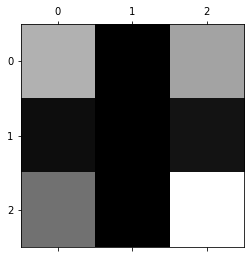

Random_Forest:


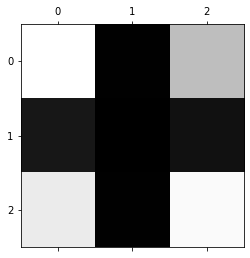

MLP:


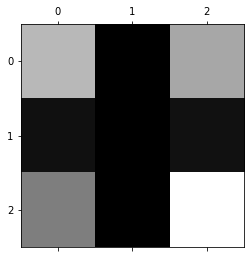

In [28]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

print("SGD:")
plt.matshow(M_S, cmap=plt.cm.gray)
plt.show()

print("Random_Forest:")
plt.matshow(M_F, cmap=plt.cm.gray)
plt.show()

print("MLP:")
plt.matshow(M_M, cmap=plt.cm.gray)
plt.show()

SGD:


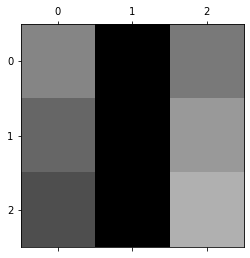

Random_Forest:


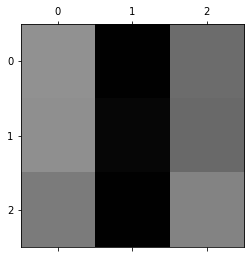

MLP:


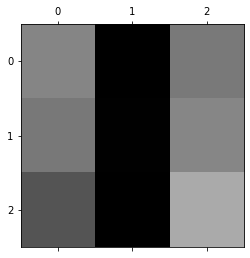

In [36]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

print("SGD:")
plt.matshow(M_Snew, cmap=plt.cm.gray,interpolation='none', vmin=0, vmax=1 )
plt.show()

print("Random_Forest:")
plt.matshow(M_Fnew, cmap=plt.cm.gray, interpolation='none', vmin=0, vmax=1)
plt.show()

print("MLP:")
plt.matshow(M_Mnew, cmap=plt.cm.gray, interpolation='none', vmin=0, vmax=1)
plt.show()